In [20]:
import requests
import numpy as np
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import linregress

from config import weather_api_key
from config import geoapify_key

In [4]:
sub_med_inc = pd.read_csv("Resources/Sub_med_inc.csv")
sub_med_inc = pd.DataFrame(sub_med_inc)
sub_med_inc.head()

,Unnamed: 0,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 13
0,ABBOTSFORD,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1341500,1409000.0,NaN
1,ABERFELDIE,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1858000,1860000,NaN,NaN
2,AINTREE,-,-,-,600000,600000,571000,557500,575000,630000,719000,760000,710000.0,NaN
3,AIREYS INLET,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1725000,1570000.0,NaN
4,AIRPORT WEST,495000,532000,575000,635000,742000,845000,845000,795000,812500,965000,926500,795000.0,NaN


In [5]:
sub_med_inc.dtypes

Unnamed: 0      object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
2019            object
2020             int64
2021             int64
2022            object
2023           float64
Unnamed: 13    float64
dtype: object

In [6]:
columns_to_convert = ["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]
for col in columns_to_convert:
    sub_med_inc[col] = pd.to_numeric(sub_med_inc[col], errors='coerce').astype(float)

sub_med_inc.dtypes

Unnamed: 0      object
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
2023           float64
Unnamed: 13    float64
dtype: object

In [7]:
sub_med_inc = sub_med_inc.rename(columns={"Unnamed: 0":"Suburb"
                                        })
sub_med_inc.head()

,Suburb,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 13
0,ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,NaN
1,ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,NaN
2,AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,NaN
3,AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,NaN
4,AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,NaN


In [8]:
del sub_med_inc["Unnamed: 13"]
sub_med_inc

,Suburb,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0
1,ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN
2,AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0
3,AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0
4,AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,YARRAM,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,360000.0,462500.0,387500.0
822,YARRAVILLE,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,1033000.0,1195000.0,1205000.0,1070000.0
823,YARRAWONGA,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,456500.0,565000.0,665000.0,591000.0
824,YEA,255000.0,260000.0,255000.0,260000.0,305000.0,385000.0,390000.0,435500.0,422500.0,570000.0,617500.0,420000.0


In [9]:
sub_data = pd.DataFrame(sub_med_inc["Suburb"])
sub_data.set_index('Suburb', inplace=True)
sub_data["Lat"] = ""
sub_data["Lon"] = ""
sub_data["Temp"] = ""
sub_data.head()

,Lat,Lon,Temp
Suburb,,,
ABBOTSFORD,,,
ABERFELDIE,,,
AINTREE,,,
AIREYS INLET,,,
AIRPORT WEST,,,


In [10]:
# Set the API base URL
url = "https://api.geoapify.com/v1/geocode/search?text="

# Loop through all the cities in our list to fetch weather data
for suburb in sub_data.index:

    # Create endpoint URL with each city
    
    suburb_formatted = suburb + ", Victoria, Australia"
    
    suburb_url = f"{url}{suburb_formatted}&format=json&apiKey={geoapify_key}"
    
    print(suburb_url)
    
        # Run an API request for each of the cities
    try:
        print(f"{suburb} found and processing")
        
        # Parse the JSON and retrieve data
        sub_loc = requests.get(suburb_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        sub_lat = sub_loc["results"][0]["lat"]
        sub_lng = sub_loc["results"][0]["lon"]

        # Append the City information into city_data list
        sub_data.loc[suburb, "Lat"] = sub_lat
        sub_data.loc[suburb, "Lon"] = sub_lng
    
        print(f"{sub_lat}, {sub_lng}")
                                            

    # If an error is experienced, skip the city
    except:
            print("Suburb not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.geoapify.com/v1/geocode/search?text=ABBOTSFORD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
ABBOTSFORD found and processing
-37.8045508, 144.9988542
https://api.geoapify.com/v1/geocode/search?text=ABERFELDIE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
ABERFELDIE found and processing
-37.7596196, 144.8974571
https://api.geoapify.com/v1/geocode/search?text=AINTREE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
AINTREE found and processing
-37.7193933, 144.6694023
https://api.geoapify.com/v1/geocode/search?text=AIREYS INLET, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
AIREYS INLET found and processing
-38.4620894, 144.1067555
https://api.geoapify.com/v1/geocode/search?text=AIRPORT WEST, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
AIRPORT WEST found and processing
-37.7222576, 144.8834942
https://api.geoapify.com/v1/geocode/search?text=ALBAN

-38.3707915, 145.1171365
https://api.geoapify.com/v1/geocode/search?text=BALNARRING BEACH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BALNARRING BEACH found and processing
-38.3912033, 145.1200713
https://api.geoapify.com/v1/geocode/search?text=BALWYN, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BALWYN found and processing
-37.8091737, 145.0833678
https://api.geoapify.com/v1/geocode/search?text=BALWYN NORTH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BALWYN NORTH found and processing
-37.7919518, 145.0842372
https://api.geoapify.com/v1/geocode/search?text=BANDIANA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BANDIANA found and processing
-36.1468485, 146.9242396
https://api.geoapify.com/v1/geocode/search?text=BANNOCKBURN, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BANNOCKBURN found and processing
-38.0443362, 144.1738367
https://api.geoapify.com

-37.0243404, 145.8577689
https://api.geoapify.com/v1/geocode/search?text=BONSHAW, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BONSHAW found and processing
-37.6073971, 143.8182956
https://api.geoapify.com/v1/geocode/search?text=BOOLARRA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BOOLARRA found and processing
-38.3813131, 146.2721984
https://api.geoapify.com/v1/geocode/search?text=BOORT, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BOORT found and processing
-36.1177895, 143.7222634
https://api.geoapify.com/v1/geocode/search?text=BORONIA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BORONIA found and processing
-37.8563043, 145.2859658
https://api.geoapify.com/v1/geocode/search?text=BOTANIC RIDGE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
BOTANIC RIDGE found and processing
-38.1413786, 145.2566183
https://api.geoapify.com/v1/geocode/search?text=BO

-38.6717208, 145.6160882
https://api.geoapify.com/v1/geocode/search?text=CAPE SCHANCK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
CAPE SCHANCK found and processing
-38.4616539, 144.8974798
https://api.geoapify.com/v1/geocode/search?text=CAPEL SOUND, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
CAPEL SOUND found and processing
-38.3737241, 144.8755654
https://api.geoapify.com/v1/geocode/search?text=CARDIGAN, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
CARDIGAN found and processing
-37.535672500000004, 143.74520199849513
https://api.geoapify.com/v1/geocode/search?text=CARISBROOK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
CARISBROOK found and processing
-37.048901, 143.8143583
https://api.geoapify.com/v1/geocode/search?text=CARLTON, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
CARLTON found and processing
-37.8004228, 144.9684343
https://api.geoapify

-35.80826, 144.2200068
https://api.geoapify.com/v1/geocode/search?text=COLAC, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
COLAC found and processing
-38.3399766, 143.5858537
https://api.geoapify.com/v1/geocode/search?text=COLDSTREAM, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
COLDSTREAM found and processing
-37.7291014, 145.378424
https://api.geoapify.com/v1/geocode/search?text=COLERAINE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
COLERAINE found and processing
-37.5998611, 141.6895453
https://api.geoapify.com/v1/geocode/search?text=COLLINGWOOD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
COLLINGWOOD found and processing
-37.802104, 144.9881387
https://api.geoapify.com/v1/geocode/search?text=CONNEWARRE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
CONNEWARRE found and processing
-38.2621825, 144.3979348
https://api.geoapify.com/v1/geocode/search?t

-37.6669718, 145.1587044
https://api.geoapify.com/v1/geocode/search?text=DIGGERS REST, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
DIGGERS REST found and processing
-37.6280256, 144.720969
https://api.geoapify.com/v1/geocode/search?text=DIMBOOLA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
DIMBOOLA found and processing
-36.4554409, 142.0270495
https://api.geoapify.com/v1/geocode/search?text=DINGLEY VILLAGE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
DINGLEY VILLAGE found and processing
-37.9755762, 145.1256478
https://api.geoapify.com/v1/geocode/search?text=DINNER PLAIN, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
DINNER PLAIN found and processing
-37.0235844, 147.2389786
https://api.geoapify.com/v1/geocode/search?text=DONALD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
DONALD found and processing
-36.3701184, 142.9830851
https://api.geoapify.com/

-37.9985273, 145.2469497
https://api.geoapify.com/v1/geocode/search?text=EUREKA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
EUREKA found and processing
-37.5647184, 143.8825965
https://api.geoapify.com/v1/geocode/search?text=EUROA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
EUROA found and processing
-36.7527608, 145.568763
https://api.geoapify.com/v1/geocode/search?text=EYNESBURY, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
EYNESBURY found and processing
-37.7908381, 144.5561657
https://api.geoapify.com/v1/geocode/search?text=FAIRFIELD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
FAIRFIELD found and processing
-37.7845032, 145.0158191
https://api.geoapify.com/v1/geocode/search?text=FAIRHAVEN, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
FAIRHAVEN found and processing
-38.4664229, 144.0828184
https://api.geoapify.com/v1/geocode/search?text=FAWKNER

-37.1861324, 146.0667074
https://api.geoapify.com/v1/geocode/search?text=GOWANBRAE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
GOWANBRAE found and processing
-37.7027183, 144.8975976
https://api.geoapify.com/v1/geocode/search?text=GRANTVILLE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
GRANTVILLE found and processing
-38.4073922, 145.5318538
https://api.geoapify.com/v1/geocode/search?text=GREEN LAKE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
GREEN LAKE found and processing
-38.49828675, 145.1531419061144
https://api.geoapify.com/v1/geocode/search?text=GREENSBOROUGH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
GREENSBOROUGH found and processing
-37.6988474, 145.1074004
https://api.geoapify.com/v1/geocode/search?text=GREENVALE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
GREENVALE found and processing
-37.6377329, 144.8810975
https://api.geoapify.

-38.1377812, 144.7019979
https://api.geoapify.com/v1/geocode/search?text=INGLEWOOD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
INGLEWOOD found and processing
-36.5731171, 143.8685313
https://api.geoapify.com/v1/geocode/search?text=INVERLOCH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
INVERLOCH found and processing
-38.6331582, 145.7279504
https://api.geoapify.com/v1/geocode/search?text=INVERMAY PARK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
INVERMAY PARK found and processing
-37.527511000000004, 143.85976386303463
https://api.geoapify.com/v1/geocode/search?text=IRONBARK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
IRONBARK found and processing
-36.7559063, 144.2668733
https://api.geoapify.com/v1/geocode/search?text=IRYMPLE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
IRYMPLE found and processing
-34.235623, 142.1704328
https://api.geoapify.com

-37.715569, 145.0355601
https://api.geoapify.com/v1/geocode/search?text=KINGSVILLE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
KINGSVILLE found and processing
-37.8088622, 144.8794356
https://api.geoapify.com/v1/geocode/search?text=KNOXFIELD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
KNOXFIELD found and processing
-37.8897731, 145.2496342
https://api.geoapify.com/v1/geocode/search?text=KOO WEE RUP, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
KOO WEE RUP found and processing
-38.1990553, 145.492854
https://api.geoapify.com/v1/geocode/search?text=KOONDROOK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
KOONDROOK found and processing
-35.6361805, 144.1269388
https://api.geoapify.com/v1/geocode/search?text=KOROIT, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
KOROIT found and processing
-38.2909806, 142.3642583
https://api.geoapify.com/v1/geocode/search

-37.9348771, 145.3017588
https://api.geoapify.com/v1/geocode/search?text=LYSTERFIELD SOUTH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
LYSTERFIELD SOUTH found and processing
-37.9524844, 145.2669275
https://api.geoapify.com/v1/geocode/search?text=MACEDON, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MACEDON found and processing
-37.4214267, 144.5636447
https://api.geoapify.com/v1/geocode/search?text=MACLEOD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MACLEOD found and processing
-37.7204404, 145.069828
https://api.geoapify.com/v1/geocode/search?text=MACS COVE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MACS COVE found and processing
-37.20586, 146.14491769819904
https://api.geoapify.com/v1/geocode/search?text=MADDINGLEY, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MADDINGLEY found and processing
-37.6974706, 144.4194664
https://api.geoapify.com/v

-34.195274, 142.1503146
https://api.geoapify.com/v1/geocode/search?text=MILL PARK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MILL PARK found and processing
-37.6641334, 145.0642681
https://api.geoapify.com/v1/geocode/search?text=MILLGROVE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MILLGROVE found and processing
-37.7515012, 145.6612026
https://api.geoapify.com/v1/geocode/search?text=MINERS REST, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MINERS REST found and processing
-37.4845541, 143.8029124
https://api.geoapify.com/v1/geocode/search?text=MINYIP, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MINYIP found and processing
-36.4612399, 142.5871266
https://api.geoapify.com/v1/geocode/search?text=MIRBOO NORTH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
MIRBOO NORTH found and processing
-38.4009793, 146.1589628
https://api.geoapify.com/v1/geocode/s

-38.04913355, 145.30398976081932
https://api.geoapify.com/v1/geocode/search?text=NATHALIA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
NATHALIA found and processing
-36.0578072, 145.207485
https://api.geoapify.com/v1/geocode/search?text=NATIMUK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
NATIMUK found and processing
-36.741498, 141.9421055
https://api.geoapify.com/v1/geocode/search?text=NEERIM SOUTH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
NEERIM SOUTH found and processing
-38.0156764, 145.9537975
https://api.geoapify.com/v1/geocode/search?text=NELSON, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
NELSON found and processing
-38.0472404, 141.0063687
https://api.geoapify.com/v1/geocode/search?text=NERRINA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
NERRINA found and processing
-37.538454, 143.892194291593
https://api.geoapify.com/v1/geocode/sear

-38.079153, 145.4833359
https://api.geoapify.com/v1/geocode/search?text=PARADISE BEACH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
PARADISE BEACH found and processing
-38.1893528, 147.4240851
https://api.geoapify.com/v1/geocode/search?text=PARK ORCHARDS, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
PARK ORCHARDS found and processing
-37.7778362, 145.2140351
https://api.geoapify.com/v1/geocode/search?text=PARKDALE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
PARKDALE found and processing
-37.9918673, 145.081286
https://api.geoapify.com/v1/geocode/search?text=PARKVILLE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
PARKVILLE found and processing
-37.7871148, 144.9515533
https://api.geoapify.com/v1/geocode/search?text=PASCOE VALE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
PASCOE VALE found and processing
-37.721132600000004, 144.94555328819467
https:/

-37.4587733, 144.6776503
https://api.geoapify.com/v1/geocode/search?text=RINGWOOD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
RINGWOOD found and processing
-37.8113584, 145.230639
https://api.geoapify.com/v1/geocode/search?text=RINGWOOD EAST, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
RINGWOOD EAST found and processing
-37.8122942, 145.2525895
https://api.geoapify.com/v1/geocode/search?text=RINGWOOD NORTH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
RINGWOOD NORTH found and processing
-37.7950927, 145.2331186
https://api.geoapify.com/v1/geocode/search?text=RIPPLESIDE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
RIPPLESIDE found and processing
-38.1234908, 144.3563619
https://api.geoapify.com/v1/geocode/search?text=RIPPONLEA, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
RIPPONLEA found and processing
-37.8777978, 144.9952778
https://api.geoapify.co

-38.4247467, 145.0554939
https://api.geoapify.com/v1/geocode/search?text=SILVERLEAVES, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SILVERLEAVES found and processing
-38.4529926, 145.2703448
https://api.geoapify.com/v1/geocode/search?text=SKENES CREEK, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SKENES CREEK found and processing
-38.7235382, 143.7137401
https://api.geoapify.com/v1/geocode/search?text=SKIPTON, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SKIPTON found and processing
-37.6867099, 143.3661092
https://api.geoapify.com/v1/geocode/search?text=SKYE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SKYE found and processing
-38.1051265, 145.2162331
https://api.geoapify.com/v1/geocode/search?text=SMITHS BEACH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SMITHS BEACH found and processing
-38.5017258, 145.2570493
https://api.geoapify.com/v1/geocode/

-38.4960078, 145.2684239
https://api.geoapify.com/v1/geocode/search?text=SUNSHINE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SUNSHINE found and processing
-37.7893319, 144.8342699
https://api.geoapify.com/v1/geocode/search?text=SUNSHINE NORTH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SUNSHINE NORTH found and processing
-37.7639467, 144.8361969
https://api.geoapify.com/v1/geocode/search?text=SUNSHINE WEST, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SUNSHINE WEST found and processing
-37.7983442, 144.8110919
https://api.geoapify.com/v1/geocode/search?text=SURF BEACH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SURF BEACH found and processing
-38.5133108, 145.2997437
https://api.geoapify.com/v1/geocode/search?text=SURREY HILLS, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
SURREY HILLS found and processing
-37.8271881, 145.0978326
https://api.geoa

-38.2637008, 145.1871641
https://api.geoapify.com/v1/geocode/search?text=UNDERBOOL, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
UNDERBOOL found and processing
-35.1708547, 141.8090935
https://api.geoapify.com/v1/geocode/search?text=UPPER FERNTREE GULLY, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
UPPER FERNTREE GULLY found and processing
-37.8966917, 145.3098755
https://api.geoapify.com/v1/geocode/search?text=UPWEY, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
UPWEY found and processing
-37.9052161, 145.3279903
https://api.geoapify.com/v1/geocode/search?text=VENTNOR, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
VENTNOR found and processing
-38.4690103, 145.1715254
https://api.geoapify.com/v1/geocode/search?text=VENUS BAY, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
VENUS BAY found and processing
-38.678502, 145.79378041026723
https://api.geoapify.com

-32.9176639, 134.0948779
https://api.geoapify.com/v1/geocode/search?text=WESTGARTH, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
WESTGARTH found and processing
-37.7805188, 144.9993767
https://api.geoapify.com/v1/geocode/search?text=WESTMEADOWS, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
WESTMEADOWS found and processing
-37.6768765, 144.8939017
https://api.geoapify.com/v1/geocode/search?text=WHEELERS HILL, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
WHEELERS HILL found and processing
-37.9103266, 145.1895175
https://api.geoapify.com/v1/geocode/search?text=WHITE HILLS, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
WHITE HILLS found and processing
-36.7293626, 144.3080701
https://api.geoapify.com/v1/geocode/search?text=WHITTINGTON, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
WHITTINGTON found and processing
-38.1771013, 144.3920658
https://api.geoapify

In [11]:
sub_data.head()

,Lat,Lon,Temp
Suburb,,,
ABBOTSFORD,-37.804551,144.998854,
ABERFELDIE,-37.75962,144.897457,
AINTREE,-37.719393,144.669402,
AIREYS INLET,-38.462089,144.106755,
AIRPORT WEST,-37.722258,144.883494,


In [12]:
# Set the API base URL
temp_url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through all the cities in our list to fetch weather data
for index, row in sub_data.iterrows():
    
    lat = row["Lat"]
    lon = row["Lon"]

    # Create endpoint URL with each city     
    suburb_url = f"{temp_url}lat={lat}&lon={lon}&appid={weather_api_key}&units=metric"

        # Run an API request for each of the cities
    try:
        print(f"{index} found and processing")
        
        # Parse the JSON and retrieve data
        sub_weather = requests.get(suburb_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        max_temp = sub_weather["main"]["temp"]

        # Append the City information into city_data list
        
        sub_data.loc[index, "Temp"] = max_temp
        
        print(max_temp)
                                  
          

    # If an error is experienced, skip the city
    except:
            print("Suburb not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ABBOTSFORD found and processing
20.04
ABERFELDIE found and processing
20.07
AINTREE found and processing
19.75
AIREYS INLET found and processing
16.86
AIRPORT WEST found and processing
19.71
ALBANVALE found and processing
19.96
ALBERT PARK found and processing
20.39
ALBION found and processing
20.25
ALEXANDRA found and processing
15.97
ALFREDTON found and processing
15.25
ALLANSFORD found and processing
14.71
ALPHINGTON found and processing
19.77
ALTONA found and processing
20.74
ALTONA EAST found and processing
20.63
ALTONA MEADOWS found and processing
20.78
ALTONA NORTH found and processing
20.65
ANGLESEA found and processing
17
APOLLO BAY found and processing
17.53
ARARAT found and processing
14.71
ARDEER found and processing
20.29
ARMADALE found and processing
19.95
ARMSTRONG CREEK found and processing
17.78
ASCOT (GREATER BENDIGO) found and processing
15.3
ASCOT VALE found and processing
20.28
ASHBURTON found and processing
19.77
ASHWOOD found and processing
19.65
ASPENDALE found 

19.64
DENNINGTON found and processing
14.32
DERRIMUT found and processing
20.33
DERRINALLUM found and processing
16.15
DIAMOND CREEK found and processing
18.75
DIGGERS REST found and processing
18.18
DIMBOOLA found and processing
19
DINGLEY VILLAGE found and processing
19.83
DINNER PLAIN found and processing
6.27
DONALD found and processing
18.59
DONCASTER found and processing
18.92
DONCASTER EAST found and processing
18.72
DONNYBROOK found and processing
17.82
DONVALE found and processing
18.79
DOREEN found and processing
17.78
DOVETON found and processing
18.77
DROMANA found and processing
17.35
DROUIN found and processing
16.7
DRUMCONDRA found and processing
17.94
DRYSDALE found and processing
18.28
DUNKELD found and processing
14.49
DUNOLLY found and processing
15.45
EAGLE POINT found and processing
15.5
EAGLEHAWK found and processing
15.07
EAGLEMONT found and processing
19.31
EAST BAIRNSDALE found and processing
15.66
EAST BENDIGO found and processing
14.93
EAST GEELONG found and 

19.24
LUCAS found and processing
15.36
LUCKNOW found and processing
15.44
LYNBROOK found and processing
18.99
LYNDHURST found and processing
19.61
LYSTERFIELD found and processing
18.47
LYSTERFIELD SOUTH found and processing
18.69
MACEDON found and processing
14.78
MACLEOD found and processing
19.24
MACS COVE found and processing
15.84
MADDINGLEY found and processing
18.05
MAFFRA found and processing
12.26
MAIDEN GULLY found and processing
15.2
MAIDSTONE found and processing
20.21
MALDON found and processing
14.62
MALLACOOTA found and processing
15.11
MALMSBURY found and processing
14.59
MALVERN found and processing
19.88
MALVERN EAST found and processing
19.98
MAMBOURIN found and processing
20.37
MANIFOLD HEIGHTS found and processing
17.65
MANOR LAKES found and processing
20.21
MANSFIELD found and processing
15.87
MARENGO found and processing
17.41
MARIBYRNONG found and processing
20.24
MARLO found and processing
15.4
MARONG found and processing
15.55
MARSHALL found and processing
17.

20.4
SELBY found and processing
17.41
SEVILLE found and processing
17.48
SEVILLE EAST found and processing
17.36
SEYMOUR found and processing
16.41
SHEPPARTON found and processing
15.86
SHEPPARTON NORTH found and processing
15.95
SHOREHAM found and processing
16.99
SILVERLEAVES found and processing
17.02
SKENES CREEK found and processing
16.24
SKIPTON found and processing
16.3
SKYE found and processing
19.44
SMITHS BEACH found and processing
16.64
SMYTHES CREEK found and processing
15.55
SMYTHESDALE found and processing
15.84
SOLDIERS HILL found and processing
15.27
SOMERS found and processing
17.09
SOMERVILLE found and processing
18.78
SORRENTO found and processing
17.33
SOUTH GEELONG found and processing
17.97
SOUTH KINGSVILLE found and processing
20.57
SOUTH MELBOURNE found and processing
20.28
SOUTH MORANG found and processing
18.43
SOUTH YARRA found and processing
20.2
SPOTSWOOD found and processing
20.52
SPRING GULLY found and processing
14.69
SPRINGVALE found and processing
19.5

In [13]:
sub_data.head()

,Lat,Lon,Temp
Suburb,,,
ABBOTSFORD,-37.804551,144.998854,20.04
ABERFELDIE,-37.75962,144.897457,20.07
AINTREE,-37.719393,144.669402,19.75
AIREYS INLET,-38.462089,144.106755,16.86
AIRPORT WEST,-37.722258,144.883494,19.71


In [35]:
merged_df = pd.merge(sub_med_inc, sub_data, on='Suburb', how='inner')
merged_df = pd.DataFrame(merged_df)
merged_df.head()

,Suburb,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Lat,Lon,Temp
0,ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,-37.804551,144.998854,20.04
1,ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,-37.75962,144.897457,20.07
2,AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,-37.719393,144.669402,19.75
3,AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,-38.462089,144.106755,16.86
4,AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,-37.722258,144.883494,19.71


In [36]:
temp_price_2023 = merged_df[["2023", "Temp"]]
temp_price_2023 = temp_price_2023.dropna(how="any")
temp_price_2023.head()

,2023,Temp
0,1409000.0,20.04
2,710000.0,19.75
3,1570000.0,16.86
4,795000.0,19.71
5,610000.0,19.96


In [37]:
columns_to_convert = ["Lat","Lon","Temp"]
for col in columns_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce').astype(float)

temp_price_2023["2023"] = pd.to_numeric(temp_price_2023["2023"], errors='coerce')
temp_price_2023["Temp"] = pd.to_numeric(temp_price_2023["Temp"], errors='coerce')

The r-squared is: 0.16379688045731555


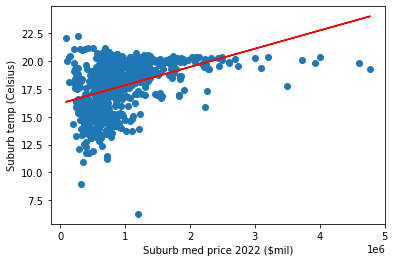

In [38]:
# Price vs Temp
x_values = temp_price_2023["2023"]
y_values = temp_price_2023["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Suburb med price 2022 ($mil)")
plt.ylabel("Suburb temp (Celsius)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [39]:
# T-Test
stats.ttest_1samp(temp_price_2023["2023"], temp_price_2023["Temp"].mean())

Ttest_1sampResult(statistic=44.822816645606494, pvalue=2.2534398421307698e-218)

In [40]:
#Finding Melbourne Lat, Lon
melb_formatted = "Melbourne, Victoria, Australia"
    
melb_url = f"{url}{melb_formatted}&format=json&apiKey={geoapify_key}"

melb_loc = requests.get(melb_url).json()

melb_lat = melb_loc["results"][0]["lat"]
melb_lng = melb_loc["results"][0]["lon"]
print(f"{melb_lat}, {melb_lng}")

-37.8142454, 144.9631732


In [41]:
# Finding Lat and Lon for Melbourne CBD
merged_df["Distance from CBD"] = ""
merged_df.set_index('Suburb', inplace=True)
merged_df.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Lat,Lon,Temp,Distance from CBD
Suburb,,,,,,,,,,,,,,,,
ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,-37.804551,144.998854,20.04,
ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,-37.759620,144.897457,20.07,
AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,-37.719393,144.669402,19.75,
AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,-38.462089,144.106755,16.86,
AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,-37.722258,144.883494,19.71,


In [42]:
# Set the API base URL
cbd_dist_url = f"https://api.geoapify.com/v1/routing?waypoints={melb_lat},{melb_lng}|"

# Loop through all the cities in our list to fetch weather data
for index, row in sub_data.iterrows():
    
    lat = row["Lat"]
    lon = row["Lon"]

    # Create endpoint URL with each city     
    suburb_cbd_dist_url = f"{cbd_dist_url}{lat},{lon}&mode=drive&apiKey={geoapify_key}"

        # Run an API request for each of the cities
    try:
        print(f"Calculating {index} from CBD")
        
        # Parse the JSON and retrieve data
        suburb_cbd = requests.get(suburb_cbd_dist_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        suburb_cbd_dist = suburb_cbd['features'][0]['properties']['distance']

        # Append the City information into city_data list
        
        merged_df.loc[index, "Distance from CBD"] = suburb_cbd_dist
        
        print(suburb_cbd_dist)
                                  
          

    # If an error is experienced, skip the city
    except:
            print("Suburb not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Calculating ABBOTSFORD from CBD
4619
Calculating ABERFELDIE from CBD
10337
Calculating AINTREE from CBD
39577
Calculating AIREYS INLET from CBD
124210
Calculating AIRPORT WEST from CBD
17919
Calculating ALBANVALE from CBD
29520
Calculating ALBERT PARK from CBD
4724
Calculating ALBION from CBD
14989
Calculating ALEXANDRA from CBD
132439
Calculating ALFREDTON from CBD
129734.00000000001
Calculating ALLANSFORD from CBD
248445
Calculating ALPHINGTON from CBD
10002
Calculating ALTONA from CBD
20470
Calculating ALTONA EAST from CBD
15077
Calculating ALTONA MEADOWS from CBD
24546
Calculating ALTONA NORTH from CBD
16728
Calculating ANGLESEA from CBD
113260
Calculating APOLLO BAY from CBD
187220
Calculating ARARAT from CBD
205903
Calculating ARDEER from CBD
24951
Calculating ARMADALE from CBD
9697
Calculating ARMSTRONG CREEK from CBD
85033
Calculating ASCOT (GREATER BENDIGO) from CBD
163777
Calculating ASCOT VALE from CBD
9625
Calculating ASHBURTON from CBD
15107
Calculating ASHWOOD from CBD
16

25962
Calculating DELACOMBE from CBD
120499
Calculating DELAHEY from CBD
31490
Calculating DENNINGTON from CBD
272556
Calculating DERRIMUT from CBD
26081
Calculating DERRINALLUM from CBD
177334
Calculating DIAMOND CREEK from CBD
30521
Calculating DIGGERS REST from CBD
35819
Calculating DIMBOOLA from CBD
336990
Calculating DINGLEY VILLAGE from CBD
29696
Calculating DINNER PLAIN from CBD
394503
Calculating DONALD from CBD
281127
Calculating DONCASTER from CBD
19225
Calculating DONCASTER EAST from CBD
23971
Calculating DONNYBROOK from CBD
49824
Calculating DONVALE from CBD
25329
Calculating DOREEN from CBD
36493
Calculating DOVETON from CBD
36576
Calculating DROMANA from CBD
85314
Calculating DROUIN from CBD
98095
Calculating DRUMCONDRA from CBD
72756
Calculating DRYSDALE from CBD
94833
Calculating DUNKELD from CBD
278222
Calculating DUNOLLY from CBD
193102
Calculating EAGLE POINT from CBD
290456
Calculating EAGLEHAWK from CBD
170509
Calculating EAGLEMONT from CBD
14687
Calculating EAST B

268411
Calculating LOCKINGTON from CBD
205817
Calculating LONG GULLY from CBD
155588
Calculating LONGWARRY from CBD
88350
Calculating LORNE from CBD
142642
Calculating LOVELY BANKS from CBD
71864
Calculating LOWER PLENTY from CBD
24455
Calculating LUCAS from CBD
128753.99999999999
Calculating LUCKNOW from CBD
287480
Calculating LYNBROOK from CBD
44608
Calculating LYNDHURST from CBD
48877
Calculating LYSTERFIELD from CBD
37745
Calculating LYSTERFIELD SOUTH from CBD
38531
Calculating MACEDON from CBD
63940
Calculating MACLEOD from CBD
20202
Calculating MACS COVE from CBD
209219
Calculating MADDINGLEY from CBD
61682
Calculating MAFFRA from CBD
218632
Calculating MAIDEN GULLY from CBD
163677
Calculating MAIDSTONE from CBD
10090
Calculating MALDON from CBD
145708
Calculating MALLACOOTA from CBD
514977
Calculating MALMSBURY from CBD
98314
Calculating MALVERN from CBD
12565
Calculating MALVERN EAST from CBD
15438
Calculating MAMBOURIN from CBD
45554
Calculating MANIFOLD HEIGHTS from CBD
77049

190473
Calculating SASSAFRAS from CBD
46580
Calculating SAWMILL SETTLEMENT from CBD
218821
Calculating SCORESBY from CBD
29420
Calculating SEA LAKE from CBD
354845
Calculating SEABROOK from CBD
25511
Calculating SEAFORD from CBD
52852
Calculating SEAHOLME from CBD
17768
Calculating SEASPRAY from CBD
242141
Calculating SEBASTOPOL from CBD
121174
Calculating SEDDON from CBD
7519
Calculating SELBY from CBD
48763
Calculating SEVILLE from CBD
53347
Calculating SEVILLE EAST from CBD
57155
Calculating SEYMOUR from CBD
112687
Calculating SHEPPARTON from CBD
191293
Calculating SHEPPARTON NORTH from CBD
196345
Calculating SHOREHAM from CBD
92082
Calculating SILVERLEAVES from CBD
141268
Calculating SKENES CREEK from CBD
182316
Calculating SKIPTON from CBD
167100
Calculating SKYE from CBD
51121
Calculating SMITHS BEACH from CBD
136433
Calculating SMYTHES CREEK from CBD
127341
Calculating SMYTHESDALE from CBD
135024
Calculating SOLDIERS HILL from CBD
121796
Calculating SOMERS from CBD
84663
Calcula

In [44]:
# Converting Distance into KM
merged_df["Distance from CBD (km)"] = merged_df["Distance from CBD"]/1000
merged_df.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Lat,Lon,Temp,Distance from CBD,Distance from CBD (km)
Suburb,,,,,,,,,,,,,,,,,
ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,-37.804551,144.998854,20.04,4619,4.619
ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,-37.759620,144.897457,20.07,10337,10.337
AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,-37.719393,144.669402,19.75,39577,39.577
AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,-38.462089,144.106755,16.86,124210,124.21
AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,-37.722258,144.883494,19.71,17919,17.919


In [45]:
# Converting Data types
columns_to_convert = ["Distance from CBD","Distance from CBD (km)"]
for col in columns_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce').astype(float)

merged_df.dtypes


2012                      float64
2013                      float64
2014                      float64
2015                      float64
2016                      float64
2017                      float64
2018                      float64
2019                      float64
2020                      float64
2021                      float64
2022                      float64
2023                      float64
Lat                       float64
Lon                       float64
Temp                      float64
Distance from CBD         float64
Distance from CBD (km)    float64
dtype: object

In [46]:
# Dropping N/A values
temp_dist = merged_df[["Temp", "Distance from CBD (km)"]]
temp_dist = temp_dist.dropna(how="any")
temp_dist.head()

,Temp,Distance from CBD (km)
Suburb,,
ABBOTSFORD,20.04,4.619
ABERFELDIE,20.07,10.337
AINTREE,19.75,39.577
AIREYS INLET,16.86,124.210
AIRPORT WEST,19.71,17.919


The r-squared is: 0.1377176968939523


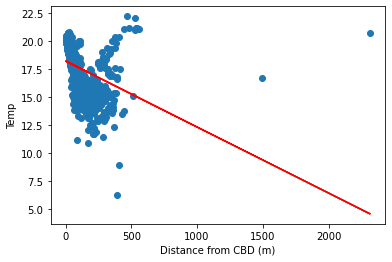

In [47]:
# Distance from CBD vs Temp
x_values = temp_dist["Distance from CBD (km)"]
y_values = temp_dist["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Distance from CBD (m)")
plt.ylabel("Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [48]:
stats.ttest_1samp(temp_dist["Distance from CBD (km)"], temp_dist["Temp"].mean())

Ttest_1sampResult(statistic=19.45883971042333, pvalue=1.0593015857987908e-69)

In [49]:
# Droping N/A Values
dist_2023 = merged_df[["2023", "Distance from CBD (km)"]]
dist_2023 = dist_2023.dropna(how="any")
dist_2023.head()

,2023,Distance from CBD (km)
Suburb,,
ABBOTSFORD,1409000.0,4.619
AINTREE,710000.0,39.577
AIREYS INLET,1570000.0,124.210
AIRPORT WEST,795000.0,17.919
ALBANVALE,610000.0,29.520


The r-squared is: 0.13249328360167065


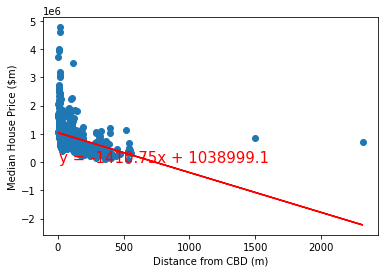

In [50]:
# Distance from CBD vs Median House price 
x_values = dist_2023["Distance from CBD (km)"]
y_values = dist_2023["2023"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Distance from CBD (m)")
plt.ylabel("Median House Price ($m)")
print(f"The r-squared is: {rvalue**2}")
plt.show()